# Netwoks in different connectivty (g):
This notebook will set networks side by side which are different in the connectivity constant "g".
This procedure will be done with the help of engine code in __network_simulation.py__ file. It contains network object and serves its behaviours.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas() #This line make sure that the progress bars looks natural.

In [3]:
from network_simulation import Kuramoto_neural_network

In [4]:
connectivity_span = np.arange(0.1,5,0.25)
num_ensembles_each_g = 2
sigma_record = np.zeros( shape = (len(connectivity_span),num_ensembles_each_g) )

## Creating various ensembles:

In [5]:
num_neurons = 10000
total_time = 100

In [6]:
for i,connectivity in enumerate(tqdm( connectivity_span , desc='Variation of connectivities') ):
    for j in tqdm( range(num_ensembles_each_g) , desc='Making ensembles'):
        sample_model = Kuramoto_neural_network(num_neurons=num_neurons,g=connectivity)
        sample_model.ignite(total_time = total_time)
        sample_model.compute_effective_field( alpha = 20)
        sigma_record[i][j] = sample_model.report_sigma()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14701.80it/s]


network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15218.15it/s]


network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16582.73it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15765.74it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16042.84it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15874.42it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14981.37it/s]


network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16016.56it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16234.46it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15905.87it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15501.49it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13730.19it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16263.72it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14386.04it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14818.86it/s]


network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14688.62it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14441.85it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14714.02it/s]


network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15860.89it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13780.33it/s]

In [7]:
# sigma_record = connectivity_record
np.save('sigma_records_{}.npy'.format(num_neurons),sigma_record)

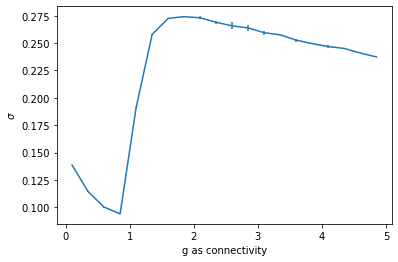

In [8]:
fig = plt.figure()
ax = fig.subplots()
ax.errorbar(x = connectivity_span, y = np.mean(sigma_record,axis = 1),yerr = np.var(sigma_record,axis = 1)**(0.5))
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$\sigma$')
fig.savefig('sigma_as_synchoronization_meter_{}.png'.format(num_neurons))

In [9]:
np.sum(sigma_record,axis = 0)

array([4.50700177, 4.50116664])